In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
#cardioData = pd.read_csv('test.csv').drop('age', axis=1)
cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

### Neural Network

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = cardioData.drop('cardio_bool', axis=1)

# One-hot encode categorical variables
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data = pd.get_dummies(data, columns=categorical_vars)

# Split data into features and target variable
X = data.drop('cardio', axis=1)
y = data['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale numeric features
scaler = StandardScaler()
numeric_vars = ['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

# Fit MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

'''
# Make predictions on test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Define custom predict_with_threshold function
def predict_with_threshold(y_pred_prob, threshold):
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
    return y_pred

# Make predictions with custom threshold value
threshold = 0.5
y_pred = predict_with_threshold(y_pred_prob, threshold)
'''

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#Accuracy: 0.723531055033057(100,)
#Accuracy: 0.723437936493156(100,1)
#Accuracy: 0.722227395474438(100,2)
#Accuracy: 0.717571468479374(100,3)
#Accuracy: 0.711891237545395(200,)
#Accuracy: 0.709190799888258(200,1)
#Accuracy: 0.713194897104013(200,2)
#Accuracy: 0.711705000465592(200,3)

Accuracy: 0.7330714285714286


### Confusion Matrix

<AxesSubplot: >

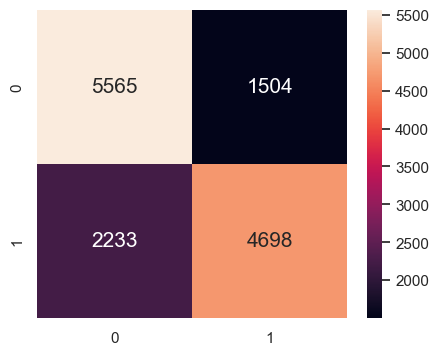

In [6]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 15})

### FPR, TPR, Threshold

In [7]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#print(f'False Positive Rate: \n {fpr} \n')
#print(f'True Positive Rate: \n {tpr} \n')

#predict the probability of the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculates fpr, tpr, thresholds (array)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

for i in range(len(thresholds)):
    print(f'Threshold: {thresholds[i]:.2f}, FPR: {fpr[i]:.6f}, TPR: {tpr[i]:.6f}')

Threshold: 2.00, FPR: 0.000000, TPR: 0.000000
Threshold: 1.00, FPR: 0.000000, TPR: 0.000144
Threshold: 0.97, FPR: 0.000000, TPR: 0.000433
Threshold: 0.97, FPR: 0.000141, TPR: 0.000433
Threshold: 0.96, FPR: 0.000141, TPR: 0.001010
Threshold: 0.96, FPR: 0.000283, TPR: 0.001010
Threshold: 0.95, FPR: 0.000283, TPR: 0.002453
Threshold: 0.95, FPR: 0.000424, TPR: 0.002453
Threshold: 0.94, FPR: 0.000424, TPR: 0.003174
Threshold: 0.94, FPR: 0.000566, TPR: 0.003174
Threshold: 0.94, FPR: 0.000566, TPR: 0.003896
Threshold: 0.94, FPR: 0.000707, TPR: 0.003896
Threshold: 0.94, FPR: 0.000707, TPR: 0.004905
Threshold: 0.94, FPR: 0.000849, TPR: 0.004905
Threshold: 0.94, FPR: 0.000849, TPR: 0.005194
Threshold: 0.94, FPR: 0.001132, TPR: 0.005194
Threshold: 0.93, FPR: 0.001132, TPR: 0.005483
Threshold: 0.93, FPR: 0.001273, TPR: 0.005483
Threshold: 0.93, FPR: 0.001273, TPR: 0.006348
Threshold: 0.93, FPR: 0.001415, TPR: 0.006348
Threshold: 0.93, FPR: 0.001415, TPR: 0.007070
Threshold: 0.93, FPR: 0.001556, TP

In [8]:
# Find index of point on ROC curve with given TPR and FPR values
tpr_value = 0.6
fpr_value = 0.2

#finds the index of the first threshold where tpr >= tpr_value and fpr <= fpr_value in the boolean array
index = ((tpr >= tpr_value) & (fpr <= fpr_value)).nonzero()[0][0]

# Find corresponding threshold value
threshold = thresholds[index]
print(f'Threshold: {threshold}')

Threshold: 0.5781319615022263


### ROC_Curve

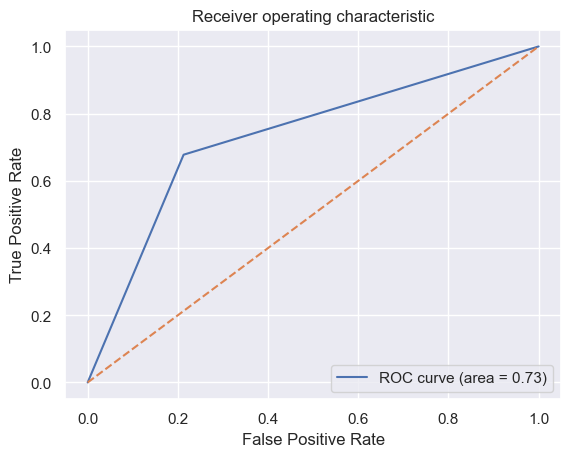

AUC: 0.7985665913375788


In [9]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

y_pred_proba = model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

### Precision-Recall Curve

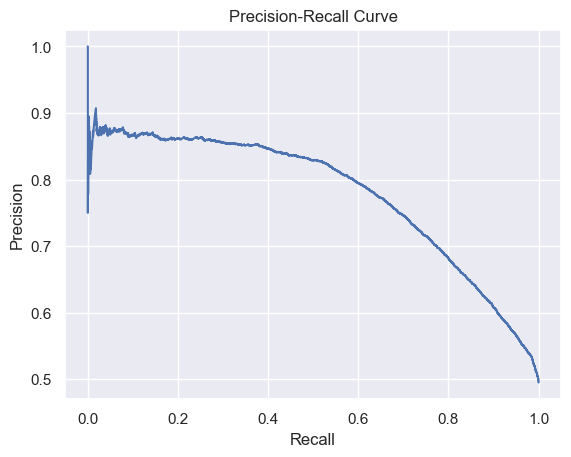

In [10]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.7574975814253466
Recall: 0.6778242677824268
F1-score: 0.7154496307012868


### Precision sample

In [12]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_pred_prob})

# Take a random sample of 100 observations
sampled_results = results.sample(n=100, random_state=0)

# Print actual and predicted values for sampled observations
for i, row in sampled_results.iterrows():
    if row["Predicted Probability"] > 0.5:
        print(f'Actual: {int(row["Actual"])}, Predicted: 1, Predicted Probability: {row["Predicted Probability"]:.2f}')
    else:
        print(f'Actual: {int(row["Actual"])}, Predicted: 0, Predicted Probability: {row["Predicted Probability"]:.2f},')

Actual: 1, Predicted: 1, Predicted Probability: 0.87
Actual: 0, Predicted: 0, Predicted Probability: 0.28,
Actual: 0, Predicted: 0, Predicted Probability: 0.05,
Actual: 1, Predicted: 0, Predicted Probability: 0.27,
Actual: 0, Predicted: 0, Predicted Probability: 0.27,
Actual: 0, Predicted: 0, Predicted Probability: 0.10,
Actual: 0, Predicted: 0, Predicted Probability: 0.16,
Actual: 0, Predicted: 0, Predicted Probability: 0.31,
Actual: 1, Predicted: 1, Predicted Probability: 0.85
Actual: 1, Predicted: 1, Predicted Probability: 0.75
Actual: 1, Predicted: 1, Predicted Probability: 0.94
Actual: 0, Predicted: 0, Predicted Probability: 0.05,
Actual: 1, Predicted: 1, Predicted Probability: 0.85
Actual: 0, Predicted: 0, Predicted Probability: 0.32,
Actual: 0, Predicted: 1, Predicted Probability: 0.51
Actual: 0, Predicted: 1, Predicted Probability: 0.51
Actual: 1, Predicted: 1, Predicted Probability: 0.81
Actual: 1, Predicted: 1, Predicted Probability: 0.74
Actual: 0, Predicted: 0, Predicted Pr

## https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/